In [7]:
## -*- coding:utf-8 -*-

##数据读入  

import numpy as np
import pandas as pd
from sklearn.ensemble import GradientBoostingClassifier
from sklearn.metrics import classification_report
from sklearn.model_selection import train_test_split
# from sklearn.metrics import classification
from sklearn.metrics import confusion_matrix
import matplotlib.pyplot as plt

#写入数据列名称   设置字段类型      
col_file = pd.read_csv("colname.csv", sep=',', header=None,index_col=None) #118个特征
allcol_list=[]
numcol_list=[]
catcol_list=[]
usecol_list=[]

for i in range(len(col_file)):
    allcol_list.append(col_file[0][i])
    if col_file[1][i]!='none' and col_file[1][i]!='flag': #num cat
        usecol_list.append(col_file[0][i])
    if col_file[1][i]=='num':
        numcol_list.append(col_file[0][i])
    if col_file[1][i]=='cat':
        catcol_list.append(col_file[0][i])
        
#读取数据  
alldata = pd.read_csv("train_test", sep=',', names=allcol_list ,index_col=None)
s=alldata.copy()
alldata.describe()
print('数据读取完成')

数据读取完成


C:\Users\14618\AppData\Local\Temp\ipykernel_2332\509972470.py:31: DtypeWarning: Columns (115,116) have mixed types. Specify dtype option on import or set low_memory=False.
  alldata = pd.read_csv("train_test", sep=',', names=allcol_list ,index_col=None)


In [8]:
#字段类型设置   

#缺失值用零填充 
alldata = alldata.replace({'\\N': np.nan})
alldata = alldata.fillna(value=0)

#cat编码序列化 
for i in catcol_list:
    alldata[i] = alldata[i].astype('category')
    alldata[i] = alldata[i].cat.codes

In [9]:
alldata.head()

,subs_id,phone_no,user_status,subs_main_acctid,net_type,subs_type,on_net_dur,gender,age,is_zero_user_mkt,...,call_total_exceed_num,flu_mainoffer_uncover_3mtimes,call_mainoffer_uncover_3mtimes,flu_mainoffer_exceed_3mtimes,call_mainoffer_exceed_3mtimes,flag,fav_val,next_fav_val,is_carryout_query,statis_month
0,**,**,US10,**,0,3,227,1,47,0,...,0,3,3,0,0,0,0,0,0,0.0
1,**,**,US10,**,0,3,226,0,48,0,...,0,0,0,0,0,0,0,0,0,0.0
2,**,**,US10,**,0,3,228,1,66,0,...,0,0,0,0,0,0,0,0,0,0.0
3,**,**,US10,**,0,2,228,1,55,0,...,0,0,0,0,0,0,0,0,0,0.0
4,**,**,US10,**,0,3,228,0,50,0,...,0,3,3,0,0,0,0,0,0,0.0


In [92]:
# 将所有的数据都获取
allX=alldata[(alldata['flag']==0)|(alldata['flag']==1)|(alldata['flag']==2)|(alldata['flag']==3)][usecol_list]
allY=alldata[(alldata['flag']==0)|(alldata['flag']==1)|(alldata['flag']==2)|(alldata['flag']==3)]['flag']

allX_train, allX_test, ally_train, ally_test = train_test_split(allX, allY, test_size=0.2, random_state=7)

In [44]:
##选取模型特征和标志 1离网模型  2携转模型  3降档模型 
X1=allX_train[(alldata['flag']==0)|(alldata['flag']==1)]
Y1=ally_train[(alldata['flag']==0)|(alldata['flag']==1)]
    
print('预处理完成')
#模型训练gbdt
model1 = GradientBoostingClassifier(learning_rate=0.4, n_estimators=50, subsample=0.75, max_depth=3, max_features='log2',
                                   random_state=49)
model1.fit(X1, Y1)
print('训练完成')

###保存模型到文件       
import pickle
with open('model/model_1.pkl', mode='wb') as file:
    pickle.dump(model1, file)


C:\Users\14618\AppData\Local\Temp\ipykernel_2332\2366465729.py:2: UserWarning: Boolean Series key will be reindexed to match DataFrame index.
  X1=allX_train[(alldata['flag']==0)|(alldata['flag']==1)]


预处理完成
训练完成


In [46]:
##选取模型特征和标志 1离网模型  2携转模型  3降档模型 
X2=allX_train[(alldata['flag']==0)|(alldata['flag']==2)]
Y2=ally_train[(alldata['flag']==0)|(alldata['flag']==2)]

print('预处理完成')
#模型训练gbdt
model2 = GradientBoostingClassifier(learning_rate=0.4, n_estimators=50, subsample=0.75, max_depth=3, max_features='log2',
                                   random_state=49)
model2.fit(X2, Y2)
print('训练完成')

###保存模型到文件       
import pickle
with open('model/model_2.pkl', mode='wb') as file:
    pickle.dump(model2, file)

C:\Users\14618\AppData\Local\Temp\ipykernel_2332\1029066373.py:2: UserWarning: Boolean Series key will be reindexed to match DataFrame index.
  X2=allX_train[(alldata['flag']==0)|(alldata['flag']==2)]


预处理完成
训练完成


In [47]:
##选取模型特征和标志 1离网模型  2携转模型  3降档模型 
X3=allX_train[(alldata['flag']==0)|(alldata['flag']==3)]
Y3=ally_train[(alldata['flag']==0)|(alldata['flag']==3)]

print('预处理完成')
#模型训练gbdt
model3 = GradientBoostingClassifier(learning_rate=0.4, n_estimators=50, subsample=0.75, max_depth=3, max_features='log2',
                                   random_state=49)
model3.fit(X3, Y3)
print('训练完成')

###保存模型到文件       
import pickle
with open('model/model_3.pkl', mode='wb') as file:
    pickle.dump(model3, file)

C:\Users\14618\AppData\Local\Temp\ipykernel_2332\201266830.py:2: UserWarning: Boolean Series key will be reindexed to match DataFrame index.
  X3=allX_train[(alldata['flag']==0)|(alldata['flag']==3)]


预处理完成
训练完成


In [80]:
y_predict_proba1 = model1.predict_proba(allX_test)
y_predict_proba2 = model2.predict_proba(allX_test)
y_predict_proba3 = model3.predict_proba(allX_test)
prob_mix = (y_predict_proba1[:, 1] * len(allX_train[alldata['flag']==1]) 
            + y_predict_proba2[:, 1] * len(allX_train[alldata['flag']==2])
            + y_predict_proba3[:, 1]* len(allX_train[alldata['flag']==3])) / len(allX_train[(alldata['flag']==1)|(alldata['flag']==2)|(alldata['flag']==3)])

C:\Users\14618\AppData\Local\Temp\ipykernel_2332\2420384303.py:4: UserWarning: Boolean Series key will be reindexed to match DataFrame index.
  prob_mix = (y_predict_proba1[:, 1] * len(allX_train[alldata['flag']==1])
C:\Users\14618\AppData\Local\Temp\ipykernel_2332\2420384303.py:5: UserWarning: Boolean Series key will be reindexed to match DataFrame index.
  + y_predict_proba2[:, 1] * len(allX_train[alldata['flag']==2])
C:\Users\14618\AppData\Local\Temp\ipykernel_2332\2420384303.py:6: UserWarning: Boolean Series key will be reindexed to match DataFrame index.
  + y_predict_proba3[:, 1]* len(allX_train[alldata['flag']==3])) / len(allX_train[(alldata['flag']==1)|(alldata['flag']==2)|(alldata['flag']==3)])
C:\Users\14618\AppData\Local\Temp\ipykernel_2332\2420384303.py:6: UserWarning: Boolean Series key will be reindexed to match DataFrame index.
  + y_predict_proba3[:, 1]* len(allX_train[alldata['flag']==3])) / len(allX_train[(alldata['flag']==1)|(alldata['flag']==2)|(alldata['flag']==3)]

In [81]:
print(prob_mix)

[0.45309668 0.11247197 0.47122521 ... 0.37285001 0.05306068 0.09958607]


In [86]:
# 融合版预测结果,方法是直接将预测的概率进行平均，然后得出最终的离网概率在测试集里看效果
y_predict_mix = []
for p in prob_mix:
    if p > 0.5:
        y_predict_mix.append(1)
    else:
        y_predict_mix.append(0)
y_predict_mix = np.array(y_predict_mix)

In [98]:
print(type(ally_test))
ally_test = ally_test.tolist()

<class 'pandas.core.series.Series'>


In [99]:
i = 0
for i in range(len(ally_test)):
    if ally_test[i] != 0:
        ally_test[i] = 1

In [100]:
print(len(ally_test))
print(len(allX_test))
print(len(y_predict_mix))

3624
3624
3624


In [101]:
## 评估结果
print(classification_report(ally_test, y_predict_mix))
print(confusion_matrix(ally_test, y_predict_mix))

              precision    recall  f1-score   support

           0       0.57      0.92      0.70      1813
           1       0.78      0.30      0.43      1811

    accuracy                           0.61      3624
   macro avg       0.67      0.61      0.57      3624
weighted avg       0.67      0.61      0.57      3624

[[1661  152]
 [1266  545]]


In [ ]:
ally_train = ally_train.tolist()
i = 0
for i in range(len(ally_train)):
    if ally_train[i] != 0:
        ally_train[i] = 1

In [106]:
#模型训练gbdt
model = GradientBoostingClassifier(learning_rate=0.4, n_estimators=50, subsample=0.75, max_depth=3, max_features='log2',
                                   random_state=49)
model.fit(allX_train, ally_train)
print('训练完成')


###保存模型到文件       
import pickle
with open('model/model_only.pkl', mode='wb') as file:
    pickle.dump(model, file)

训练完成


In [107]:
y_pre = model.predict(allX_test)
print(classification_report(ally_test, y_pre))
print(confusion_matrix(ally_test, y_pre))

              precision    recall  f1-score   support

           0       0.70      0.67      0.68      1813
           1       0.68      0.72      0.70      1811

    accuracy                           0.69      3624
   macro avg       0.69      0.69      0.69      3624
weighted avg       0.69      0.69      0.69      3624

[[1208  605]
 [ 514 1297]]


In [8]:
## -*- coding:utf-8 -*-

##模型保存的结果上   预测阶段代码    修改读取方式    文件过大 
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
import pickle
import sys


#写入数据列名称   设置字段类型      
col_file = pd.read_csv("colname-pre.csv", sep=',', header=None,index_col=None)
allcol_list=[]
numcol_list=[]
catcol_list=[]
usecol_list=[]

for i in range(len(col_file)):
    allcol_list.append(col_file[0][i])
    if col_file[1][i]!='none' and col_file[1][i]!='flag':
        usecol_list.append(col_file[0][i])
    if col_file[1][i]=='num':
        numcol_list.append(col_file[0][i])
    if col_file[1][i]=='cat':
        catcol_list.append(col_file[0][i])
        
##模型读取  1离网模型  2携转模型  3降档模型 

with open('model/model_1.pkl', 'rb') as file:
    model_1 = pickle.load(file)

with open('model/model_2.pkl', 'rb') as file:
    model_2 = pickle.load(file)

with open('model/model_3.pkl', 'rb') as file:
    model_3 = pickle.load(file)

                                     0
call_mainoffer_uncover_num    0.219989
flu_mainoffer_uncover_num     0.104851
flu_mainoffer_exceed_ratio    0.088750
realfee_agv                   0.076967
call_total_uncover_num        0.064381
on_net_dur                    0.041220
flu_total_uncover_num         0.040153
call_mainoffer_exceed_ratio   0.027504
up_flux                       0.021721
call_mainoffer_uncover_ratio  0.020282
realfee_ratio                 0.019668
neto_calling_cnt              0.017084
l_10086_dur                   0.014432
terfee_date                   0.012780
is_terfee                     0.010877
flu_total_uncover_ratio       0.010216
call_cnt_wave                 0.008995
call_num                      0.008617
flu_mainoffer_exceed_3mtimes  0.007805
flu_mainoffer_exceed_times    0.007646


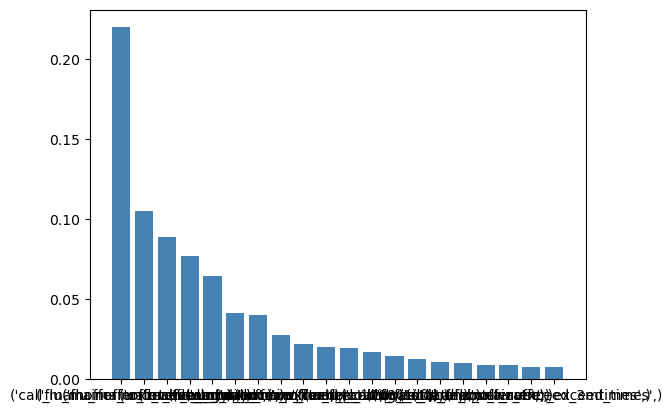

In [7]:
#变量重要性图 展示前20条  最重要的变量     
feature_importance_array = model.feature_importances_
imp_df={}
for i in range(len(usecol_list)):
    #print(usecol_list[i] + ":" + str(feature_importance_array[i]))
    imp_df[usecol_list[i]]=feature_importance_array[i]
df=pd.DataFrame(feature_importance_array,index=[usecol_list])
df_dis=df.sort_values(by=0,ascending=False).head(20)
print(df_dis)

plt.bar(x = range(len(df_dis)), # 指定条形图x轴的刻度值
height = df_dis[0], # 指定条形图y轴的数值
tick_label = df_dis.index, # 指定条形图x轴的刻度标签
color = 'steelblue', # 指定条形图的填充色
width = 0.8
)
plt.show()

## 以上重复执行（修改样本选取和模型保存），2-3模型

In [9]:
#读取数据 
all = pd.read_csv("pre_test", sep=',', names=allcol_list ,header=None,index_col=False,chunksize=1000000)
for chunk in all:
    s=chunk.copy()
    alldata=chunk
#     alldata.describe()
#     print(chunk)
    print('数据读取完成')

###缺失值用零填充 
alldata = alldata.replace({'\\N': np.nan})
alldata = alldata.fillna(value=0)

 #cat编码序列化   
for i in catcol_list:
    alldata[i] = alldata[i].astype('category')
    alldata[i] = alldata[i].cat.codes

数据读取完成


In [10]:
##预测   输出三个子模型的得分   
X=alldata[usecol_list]

y_predict_proba_1 = pd.Series(model_1.predict_proba(X)[:,1].tolist(),index=alldata.index)

y_predict_proba_2 = pd.Series(model_2.predict_proba(X)[:,1].tolist(),index=alldata.index)

y_predict_proba_3 = pd.Series(model_3.predict_proba(X)[:,1].tolist(),index=alldata.index)


imp_list_1 = ['realfee_agv','called_cnt','on_net_dur','call_cnt','neti_called_cnt']   
imp_list_2 = ['is_carryout_query','smos_xie_allmon','called_num','realfee_agv','neto_called_cnt']                
imp_list_3 = ['flu_mainoffer_uncover_times','call_mainoffer_uncover_num','realfee_agv','flu_total_uncover_num','call_total_uncover_times']       

s['realfee_agv']=s['realfee_agv']/100

result_data = pd.concat([s['subs_id'],y_predict_proba_1,s[imp_list_1],y_predict_proba_2,s[imp_list_2],y_predict_proba_3,s[imp_list_3]],axis=1)
result_data.rename(columns={0:'proba_1',1:'proba_2',2:'proba_3'},inplace=True)  
result_data.head()

,subs_id,proba_1,realfee_agv,called_cnt,on_net_dur,call_cnt,neti_called_cnt,proba_2,is_carryout_query,smos_xie_allmon,called_num,realfee_agv,neto_called_cnt,proba_3,flu_mainoffer_uncover_times,call_mainoffer_uncover_num,realfee_agv,flu_total_uncover_num,call_total_uncover_times
0,**,0.737005,32.3933,59,255,80,35,0.775741,8,0,26,32.3933,24,0.478396,9.9740,0,32.3933,0.9974,74
1,**,0.913437,57.0000,34,256,45,16,0.927865,8,0,20,57.0000,17,0.533552,19.9962,0,57.0000,0.9998,488
2,**,0.767374,60.0667,98,273,155,80,0.995724,38,0,28,60.0667,18,0.354710,8.7150,0,60.0667,0.8715,93
3,**,0.608024,43.0667,41,271,67,20,0.998278,8,0,26,43.0667,21,0.344056,9310.8923,0,43.0667,0.9992,32
4,**,0.795370,190.8200,270,271,504,193,0.994282,58,0,75,190.8200,77,0.308813,68.5721,0,190.8200,0.9796,723


In [11]:
###稳定度综合得分计算 
#1 降档模型分档字段设计
#2 汇总生成 稳定度综合得分   
#分档位值处理       

s = s.replace({'\\N': np.nan})
s = s.fillna(value=0)
fav_list=s['fav_val'].copy().astype('float')

fav_list[(fav_list>=0) & (fav_list<=8)]=1.0  
fav_list[(fav_list>8) & (fav_list<18 )]=0.280
fav_list[(fav_list>=18  ) & (fav_list<20 )]=0.555
fav_list[(fav_list>=20) & (fav_list<28 )]=0.588
fav_list[(fav_list>=28) & (fav_list<38 )]=0.687
fav_list[(fav_list>=38) & (fav_list<48 )]=0.650
fav_list[(fav_list>=48) & (fav_list<50 )]=0.528
fav_list[(fav_list>=50) & (fav_list<58 )]=0.569
fav_list[(fav_list>=58) & (fav_list<68 )]=0.651
fav_list[(fav_list>=68) & (fav_list<78 )]=0.356
fav_list[(fav_list>=78) & (fav_list<88 )]=0.472
fav_list[(fav_list>=88) & (fav_list<98 )]=0.399
fav_list[(fav_list>=98) & (fav_list<108)]=0.507
fav_list[(fav_list>=108) & (fav_list<118)]=0.386
fav_list[(fav_list>=118) & (fav_list<128)]=0.450
fav_list[(fav_list>=128) & (fav_list<138)]=0.498
fav_list[(fav_list>=138) & (fav_list<158)]=0.414
fav_list[(fav_list>=158) & (fav_list<168)]=0.480
fav_list[(fav_list>=168) & (fav_list<188)]=0.499
fav_list[(fav_list>=188) & (fav_list<198)]=0.511
fav_list[(fav_list>=198) & (fav_list<218)]=0.516
fav_list[(fav_list>=218) & (fav_list<238)]=0.451
fav_list[(fav_list>=238) & (fav_list<258)]=0.472
fav_list[(fav_list>=258) & (fav_list<268)]=0.330
fav_list[(fav_list>=268) & (fav_list<288)]=0.542
fav_list[(fav_list>=288) & (fav_list<298)]=0.575
fav_list[(fav_list>=298) & (fav_list<338)]=0.534
fav_list[(fav_list>=338) & (fav_list<388)]=0.568
fav_list[(fav_list>=388) & (fav_list<398)]=0.669
fav_list[(fav_list>=398) & (fav_list<588)]=0.686
fav_list[(fav_list>=588) & (fav_list<598)]=0.730
fav_list[ fav_list>=598                   ]=0.792


In [12]:
#计算 降档分层系数
result_data['down_ratio']=fav_list
result_data['fav_val'] = s['fav_val'].astype('int')
#result_data['stable_score_v2']=(result_data['proba_1']+result_data['proba_2'])/2
result_data['stable_score_v3']=(result_data['proba_1']+result_data['proba_2']+result_data['proba_3']*result_data['down_ratio'])/(2+result_data['down_ratio'])

result_data['proba_1']=(1-result_data['proba_1'])*100
result_data['proba_2']=(1-result_data['proba_2'])*100
result_data['proba_3']=(1-result_data['proba_3'])*100
#result_data['stable_score_v2']=(1-result_data['stable_score_v2'])*100
result_data['stable_score_v3']=(1-result_data['stable_score_v3'])*100
result_data['statis_month']=s['statis_month']


print('结果生成完成')
result_data.round(3).to_csv("output/result_test", sep=',', header=True, index=False, encoding="UTF-8")

print('结果写入文件完成')

result_data.head()

结果生成完成
结果写入文件完成


,subs_id,proba_1,realfee_agv,called_cnt,on_net_dur,call_cnt,neti_called_cnt,proba_2,is_carryout_query,smos_xie_allmon,...,proba_3,flu_mainoffer_uncover_times,call_mainoffer_uncover_num,realfee_agv,flu_total_uncover_num,call_total_uncover_times,down_ratio,fav_val,stable_score_v3,statis_month
0,**,26.299456,32.3933,59,255,80,35,22.425875,8,0,...,52.160357,9.9740,0,32.3933,0.9974,74,1.0,0,33.628562,0
1,**,8.656274,57.0000,34,256,45,16,7.213522,8,0,...,46.644824,19.9962,0,57.0000,0.9998,488,1.0,0,20.838207,0
2,**,23.262554,60.0667,98,273,155,80,0.427570,38,0,...,64.528960,8.7150,0,60.0667,0.8715,93,1.0,0,29.406361,0
3,**,39.197645,43.0667,41,271,67,20,0.172222,8,0,...,65.594389,9310.8923,0,43.0667,0.9992,32,1.0,0,34.988085,0
4,**,20.463003,190.8200,270,271,504,193,0.571805,58,0,...,69.118693,68.5721,0,190.8200,0.9796,723,1.0,0,30.051167,0


# 使用单个模型方案

In [ ]:
##选取模型特征和标志 1离网模型  2携转模型  3降档模型 
    
#切分训练集
X_train, X_test, y_train, y_test = train_test_split(X, Y, test_size=0.2, random_state=7)

print('预处理完成')
#模型训练gbdt
model = GradientBoostingClassifier(learning_rate=0.4, n_estimators=50, subsample=0.75, max_depth=3, max_features='log2',
                                   random_state=49)
model.fit(X_train, y_train)
print('训练完成')


###保存模型到文件       
import pickle
with open('model/model_only.pkl', mode='wb') as file:
    pickle.dump(model, file)

预处理完成
训练完成
